<a href="https://colab.research.google.com/github/hadiidfajri/Big-Data/blob/main/Clustering_Product_Review_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Library

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Read The data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadyinky/sephora-products-and-skincare-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sephora-products-and-skincare-reviews' dataset.
Path to dataset files: /kaggle/input/sephora-products-and-skincare-reviews


In [3]:
import os

# List files in the downloaded directory
file_list = os.listdir(path)
print("Files in the downloaded directory:", file_list)

# Assuming the CSV file has a similar name to the dataset or a common name
# You might need to adjust the filename based on the actual contents of the directory
csv_filename = "reviews_1250-end.csv"

if csv_filename:
    csv_filepath = os.path.join(path, csv_filename)
    df = pd.read_csv(csv_filepath)
    display(df.head()) # Display the head of the dataframe to confirm it's loaded
else:
    print("No CSV file found in the downloaded directory.")
    df = None # Set df to None if no CSV is found

Files in the downloaded directory: ['product_info.csv', 'reviews_500-750.csv', 'reviews_750-1250.csv', 'reviews_1250-end.csv', 'reviews_250-500.csv', 'reviews_0-250.csv']


/tmp/ipython-input-2537766933.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filepath)


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [4]:
modus_isrecommended=df["is_recommended"].mode()[0]
df['is_recommended']=df['is_recommended'].fillna(modus_isrecommended)


In [5]:
columns_to_impute_mode = ["skin_type","hair_color","eye_color","skin_tone"]

for column in columns_to_impute_mode :
  mode_value=df[column].mode()[0]
  df[column]=df[column].fillna(mode_value)
  print(f"Missing values in {column} : {df[column].isnull().sum()}")



Missing values in skin_type : 0
Missing values in hair_color : 0
Missing values in eye_color : 0
Missing values in skin_tone : 0


In [6]:
df['helpfulness']=df['helpfulness'].fillna(0)

In [7]:
# Memisahkan fitur numerik dan kategori
num_features = [
    "rating", "is_recommended", "helpfulness", "total_feedback_count",
    "total_neg_feedback_count", "total_pos_feedback_count", "price_usd"
]

cat_features = ["skin_tone", "eye_color", "skin_type", "hair_color"]

# Preprocessing
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_features)
])


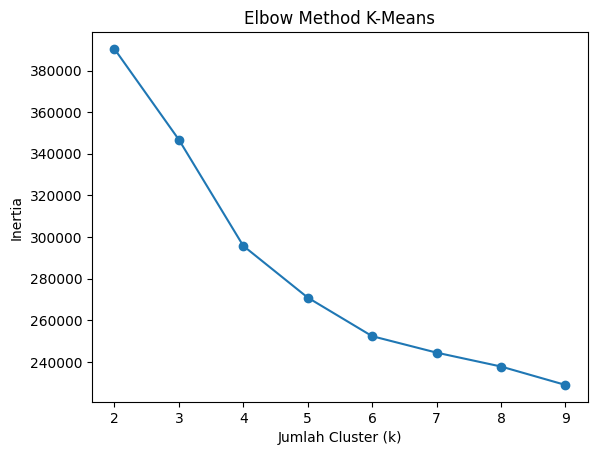

In [8]:

# ==========================
# 1) ELBOW METHOD K-MEANS
# ==========================
inertia_list = []
for k in range(2, 10):
    kmeans = Pipeline([
        ("preprocess", preprocess),
        ("kmeans", KMeans(n_clusters=k, random_state=42))
    ])
    kmeans.fit(df)
    inertia_list.append(kmeans.named_steps["kmeans"].inertia_)

plt.plot(range(2, 10), inertia_list, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method K-Means")
plt.show()


In [15]:

# ==========================
# 3) FIT K-MEANS OPTIMAL (misal k=3)
# ==========================
kmeans_opt = Pipeline([
    ("preprocess", preprocess),
    ("kmeans", KMeans(n_clusters=3, random_state=42))
])

df["kmeans_cluster"] = kmeans_opt.fit_predict(df)

# ==========================
# 4) FIT DBSCAN
# ==========================
dbscan = Pipeline([
    ("preprocess", preprocess),
    ("dbscan", DBSCAN(eps=0.7, min_samples=10))
])

df["dbscan_cluster"] = dbscan.fit_predict(df)


In [17]:
features = [
    "rating", "is_recommended", "helpfulness", "total_feedback_count",
    "total_neg_feedback_count", "total_pos_feedback_count", "price_usd",
    "skin_tone", "eye_color", "skin_type", "hair_color"
]

In [19]:

# ==========================
# 5) Melihat ringkasan tiap cluster
# ==========================
cluster_summary = df.groupby("kmeans_cluster")[num_features].agg(["mean"])
print(cluster_summary)

                  rating is_recommended helpfulness total_feedback_count  \
                    mean           mean        mean                 mean   
kmeans_cluster                                                             
0               4.717727       0.998944    0.033669             0.966967   
1               1.902491       0.045141    0.606888            16.356460   
2               4.720918       0.999518    0.885754            10.156926   

               total_neg_feedback_count total_pos_feedback_count  price_usd  
                                   mean                     mean       mean  
kmeans_cluster                                                               
0                              0.772493                 0.194474  73.721613  
1                              5.449188                10.907272  64.371105  
2                              1.420974                 8.735951  63.367521  
